In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

try:
    from data.generated.generated_data import *
except ModuleNotFoundError:
    from generated_data import *
    
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
%config IPCompleter.greedy=True


In [2]:
x,y = generate_large_num_features_dataset()
print(x.shape)
columns = []
for i in range(x.shape[1]):
    columns.append("feature_"+str(i))
df = pd.DataFrame(x, columns=columns)
df['target'] = pd.Series(y)

label = 'target'

(3500, 200)


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Columns: 201 entries, feature_0 to target
dtypes: float64(200), int64(1)
memory usage: 5.4 MB


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,target
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2.745578,-0.005367,0.240375,-0.001750,0.025181,0.283461,-0.010369,-0.004163,-0.007967,-0.570768,...,-0.047540,0.573460,0.007281,-0.019688,0.267214,-0.083938,0.033694,-0.036455,1.171386,0.500000
std,20.400064,1.001647,4.255470,0.991081,0.973291,4.146793,0.994771,0.989084,0.995439,16.986209,...,4.425588,4.309695,0.994155,0.983628,18.490855,17.057782,1.013303,0.971344,16.083220,0.500071
min,-71.682486,-4.032067,-14.834993,-3.488554,-3.587949,-13.992695,-3.471765,-4.456127,-3.679897,-64.441758,...,-15.591992,-14.161892,-3.610685,-3.665789,-69.315659,-58.971292,-3.373884,-3.937921,-56.710173,0.000000
25%,-11.017168,-0.683197,-2.688485,-0.660273,-0.615844,-2.540695,-0.682466,-0.692074,-0.687872,-11.962040,...,-3.035932,-2.377947,-0.630528,-0.679657,-11.714071,-11.385173,-0.669854,-0.694716,-9.267500,0.000000
50%,2.529430,0.004588,0.282646,0.001607,0.032368,0.249615,-0.007707,-0.027649,-0.018750,-0.313320,...,-0.144674,0.553617,0.017816,-0.013524,0.256326,0.057148,0.047014,-0.029965,0.999745,0.500000
75%,15.905133,0.669427,3.117910,0.663116,0.677073,3.046780,0.653616,0.679361,0.673625,10.905733,...,2.986337,3.525218,0.671540,0.618556,12.265962,11.297570,0.716416,0.613599,11.609091,1.000000
max,81.724504,3.720917,13.372686,3.513803,3.831073,15.580455,3.505198,3.261151,3.189310,60.525882,...,13.858026,18.562494,3.124435,3.460005,69.577500,65.630688,3.326552,3.461781,60.792692,1.000000


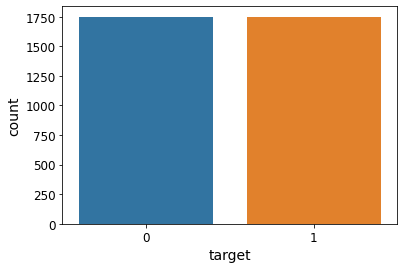

target
0    0.5
1    0.5
Name: target, dtype: float64


In [12]:
sns.countplot(x=label, data=df)
plt.show()
print(df.groupby(label)[label].apply(lambda x: x.count()/df.shape[0]))

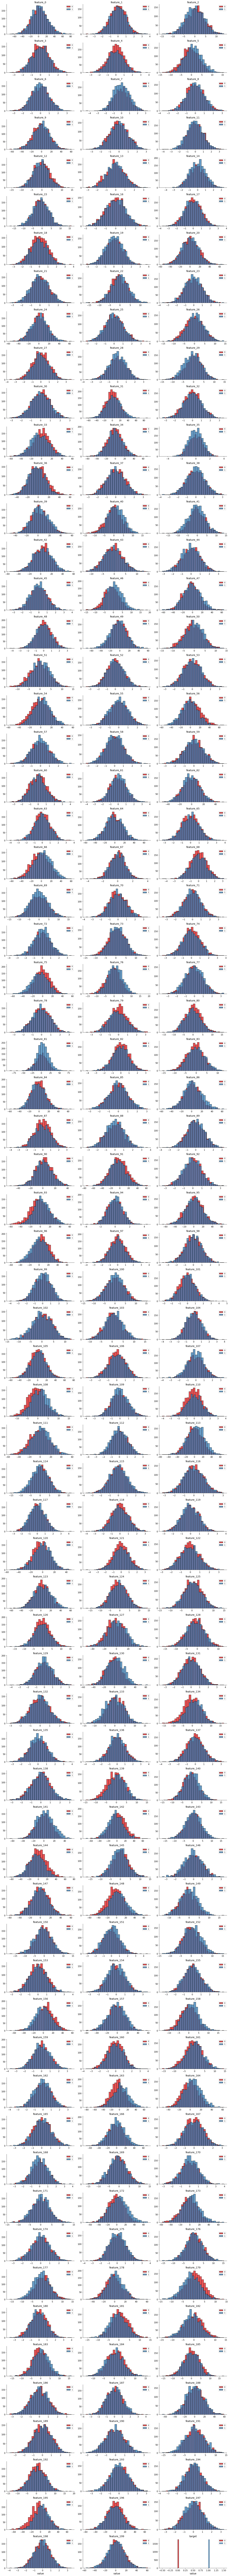

In [13]:
new_df = df.copy()
new_df['quality_index'] = new_df[label]

# plot code from https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
df2 = pd.melt(new_df, id_vars='quality_index', value_vars=new_df.drop("quality_index", axis=1).columns, value_name='value')

g = sns.FacetGrid(df2, col="variable", hue="quality_index", palette="Set1", col_wrap=3, sharex=False, sharey=False, aspect=2)
g.map(sns.histplot, 'value', bins=30)
for a in g.axes:
    a.legend()

# Found at https://github.com/mwaskom/seaborn/issues/440
plt.setp(g.fig.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.show()


In [14]:
if False:
    # Takes a long time to run
    new_df = df.copy()
    sns.pairplot(new_df, hue=label, palette="Set1")

In [15]:
corr_matrix = df.corr()
corr_matrix[label].sort_values(ascending=False)

target         1.000000
feature_163    0.213112
feature_46     0.187213
feature_108    0.184052
feature_164    0.181482
                 ...   
feature_156   -0.136454
feature_56    -0.138580
feature_142   -0.152059
feature_75    -0.167660
feature_179   -0.197381
Name: target, Length: 201, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = get_large_num_features_dataset()
print(X_train.shape)

(2800, 200)


In [8]:
import common_data_analysis

KFold_Score, classifiers, time_taken = common_data_analysis.kfolds_basic_test_all_classifiers(X_train, y_train, scoring="accuracy")

Running: rbf SVM
Time Taken: 3.8993470668792725
Running: NeuralNetwork
Time Taken: 9.33154845237732
Running: DecisionTree
Time Taken: 1.6631133556365967
Running: KNeighborsClassifier
Time Taken: 1.7627296447753906
Running: RandomForestClassifier
Time Taken: 15.110032081604004
Running: AdaBoost
Time Taken: 17.903447151184082
Final Time elapsed 49.67063236236572


In [9]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
rbf SVM,0.887500,0.907143,0.876786,0.921429,0.905357,0.899643
NeuralNetwork,0.889286,0.873214,0.869643,0.891071,0.882143,0.881071
KNeighborsClassifier,0.832143,0.842857,0.816071,0.846429,0.853571,0.838214
RandomForestClassifier,0.794643,0.792857,0.785714,0.807143,0.787500,0.793571
AdaBoost,0.707143,0.692857,0.683929,0.717857,0.689286,0.698214
DecisionTree,0.594643,0.660714,0.619643,0.616071,0.632143,0.624643


[0.50607143 0.49392857]
Number of Instances 2800
rbf SVM 		3.8994109630584717 seconds
NeuralNetwork 		9.331644535064697 seconds
DecisionTree 		1.6631791591644287 seconds
KNeighborsClassifier 		1.7628021240234375 seconds
RandomForestClassifier 		15.11008906364441 seconds
AdaBoost 		17.90350317955017 seconds


In [11]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.842857,0.876786,0.848214,0.860714,0.837500,0.853214
AdaBoost,0.789286,0.817857,0.796429,0.808929,0.798214,0.802143
KNeighborsClassifier,0.762500,0.791071,0.782143,0.775000,0.755357,0.773214
NeuralNetwork,0.764286,0.753571,0.762500,0.750000,0.771429,0.760357
rbf SVM,0.755357,0.750000,0.762500,0.760714,0.769643,0.759643
DecisionTree,0.717857,0.751786,0.758929,0.766071,0.707143,0.740357


[0.49928571 0.50071429]
Number of Instances 2800
rbf SVM 		0.5391726493835449 seconds
NeuralNetwork 		12.39056134223938 seconds
DecisionTree 		0.13706755638122559 seconds
KNeighborsClassifier 		0.1489851474761963 seconds
RandomForestClassifier 		4.23586106300354 seconds
AdaBoost 		1.1443943977355957 seconds
